# Метод Монте Карло

Варіант 4

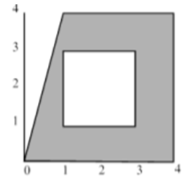

Площа трапеції (3+4)\*4/2=14
Площа внутр квадрата 2\*2=4
Площа закрашеної фігури 14-4=10

- трапеція визначена нерівностями:
  \begin{cases}
  0 \leq x \leq 4, \\
  0 \leq y \leq 3x, \quad \text{для}\quad 0 \leq x \leq 1, \\
  y = 3, \quad \text{для} \quad 1 \leq x \leq 4.
  \end{cases}

- квадрат визначений нерівностями:
  \begin{cases}
  1.5 \leq x \leq 2.5\\
  1.5 \leq y \leq 2.5.
  \end{cases}


In [362]:
import random
import matplotlib.pyplot as plt


Вважаємо що попадання у границі внутрішнього квадрату рахується за попадання у фігуру

In [363]:
def check(x, y):
    if 0 <= x <= 1:
        if y <= 4*x:
            return True
    if 1 < x < 3:
        if 0 <= y <= 1 or 3 <= y <= 4:
            return True
    if 3 <= x < 4:
        return True
    return False

In [364]:
def monte_carlo(n, S=16):
    count = 0
    for _ in range(n):
        x = random.uniform(0, 4)
        y = random.uniform(0, 4)
        if check(x, y):
            count += 1
    return S*count/n

In [365]:
def avg_monte_s(n, repeats=1000):
    sum = 0
    for _ in range(repeats):
        sum += monte_carlo(n)
    return sum/repeats

In [384]:
estimated_area = monte_carlo(3000)
real_area = 10

In [385]:
# Порівняння результатів
print("Оцінка площі методом Монте-Карло:", estimated_area)
print("Реальна площа:", real_area)
print("Абсолютна похибка:", abs(real_area - estimated_area))
print("Відносна похибка:", round(abs(real_area - estimated_area) / real_area * 100, 2),'%')

Оцінка площі методом Монте-Карло: 10.005333333333333
Реальна площа: 10
Абсолютна похибка: 0.005333333333332746
Відносна похибка: 0.05 %


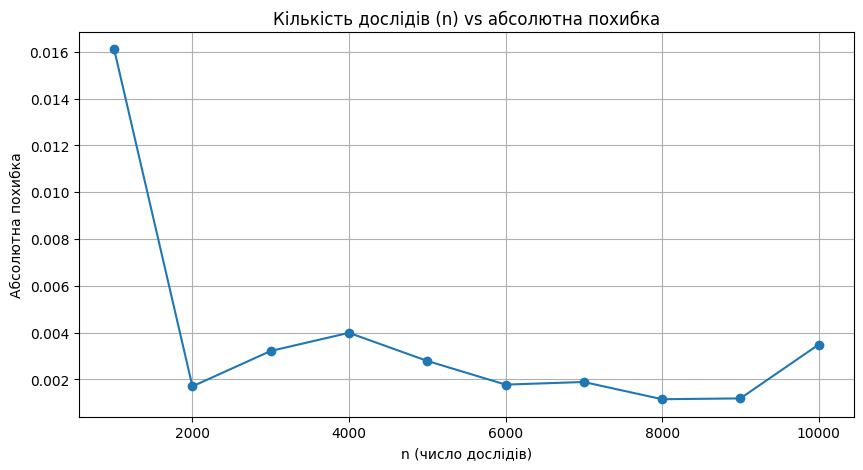

In [368]:
true_value = 10

n_values = range(1000, 10001, 1000)  
errors = []


for n in n_values:
    result = avg_monte_s(n)  
    # relative_error = abs((true_value - result) / true_value) * 100
    absolute_error = abs(true_value - result)
    errors.append(absolute_error)

plt.figure(figsize=(10, 5))
plt.plot(n_values, errors, marker='o')
plt.title('Кількість дослідів (n) vs абсолютна похибка')
plt.xlabel('n (число дослідів)')
plt.ylabel('Абсолютна похибка')
plt.grid()
plt.show()
